# HDS5210 - 2024 Final Project

Problem Statement

The research intends to establish the correlation between student’s mental health and their performance in tertiary institutions. As underpinned by the research questions, we aim to explore possible relationships between academic and mental health outcomes to enable educational institutions to improve their learning support for students with mental health concerns captured by valid measures of depression severity, sleep patterns, anxiety and other psychological factors compared with academic indices reflected through attendance rates, scores on tests, and semester evaluation marks. The main goal is to find out how and when aspects of mental health influence academic performance, with emphasis on which aspects of mental health may be indicators of later poor performance. It may be utilized for designing intervention and supportive services in educational institutions to help the youth retain student achievements and address mental issues at the same time.

Dataset - Mental Health Detection Dataset
Link for the dataset - https://www.kaggle.com/datasets/hamjashaikh/mental-health-detection-dataset

This dataset contains survey responses from patients regarding various symptoms associated with depression. Each patient answered 14 questions, and the responses are coded from 1 to 6 based on the frequency of experiencing each symptom. Additionally, the dataset includes a column indicating the patient's overall depression state.

Dataset - Student Performace Dataset
Link for the dataset - https://www.kaggle.com/datasets/dhrumilgohel/student-performace-dataset





In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
mental = pd.read_excel('/content/Deepression.xlsx')
mental.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate


In [35]:
mental.columns

Index(['Number ', 'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy', 'Depression State'],
      dtype='object')

It assigns the mean value of all their symptom scores as an average or mean mental health score for each student. This aggregation is helpful because it gives a simple scalar value which quantizes a student’s multivariate mental status regarding sleep, appetite, interest, etc. This means, instead of using 14 scores individually, the composite score allows one to study relationship between mental health and academic performance or examine students’ overall mental health, as well as determine which students might require help according to their overall symptom severity. The mean is used because all symptoms are of equal importance and there is a standardized approach to combining these different measures into one single score between 1 and 5.

In [36]:
# Calculate average mental health scores
mental['mental_health_score'] = mental[['Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
                                      'Concentration', 'Agitation', 'Suicidal Ideation',
                                      'Sleep Disturbance', 'Aggression', 'Panic Attacks',
                                      'Hopelessness', 'Restlessness', 'Low Energy']].mean(axis=1)
mental.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State,mental_health_score
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild,3.571429
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate,2.214286
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe,2.214286
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression,3.571429
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate,2.214286


This code maps the categorical Depression State values to quantitative values so that there can be computation of statistics. This forms an ordinal scale keeping in mind the flow from “No depression”– 0, “Mild” – 1, “Moderate” – 2, “Severe” –3. This numeric transformation is crucial in any mathematical, correlation analytical, regression modeling, statistical tests, and even sorting algorithms that need numerical values. The mapping also simplifies the visualization of trends and patterns because many of the visualization tools and statistical functions perform better with numbers than with names.

In [37]:
# Transform Depression State to numeric
depression_map = {'No depression': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3}
mental['Depression_Numeric'] = mental['Depression State'].map(depression_map)
mental.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State,mental_health_score,Depression_Numeric
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild,3.571429,1.0
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate,2.214286,2.0
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe,2.214286,3.0
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression,3.571429,0.0
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate,2.214286,2.0


In [38]:
student = pd.read_csv("/content/training_data_final.csv")
student.head()

,id_semester_evaluation,sem_present_count,sem_absent_count,sem_eval_lec_test_1_mark,sem_eval_lab_test_1_mark,semester_evaluation_mid_mark,sem_eval_lec_test_2_mark,sem_eval_lab_test_2_mark,semester_evaluation_pre_gtu_mark,semester_evaluation_internal_mark,semester_evaluation_gtu_mark
0,1,98,2,27,30,29,29,29,29,29,69
1,2,76,24,16,16,16,16,16,16,16,42
2,3,81,19,17,17,17,15,17,16,17,45
3,4,98,2,28,30,29,30,30,30,30,69
4,5,92,8,25,24,25,24,23,24,25,59


In [39]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   id_semester_evaluation             690 non-null    int64
 1   sem_present_count                  690 non-null    int64
 2   sem_absent_count                   690 non-null    int64
 3   sem_eval_lec_test_1_mark           690 non-null    int64
 4   sem_eval_lab_test_1_mark           690 non-null    int64
 5   semester_evaluation_mid_mark       690 non-null    int64
 6   sem_eval_lec_test_2_mark           690 non-null    int64
 7   sem_eval_lab_test_2_mark           690 non-null    int64
 8   semester_evaluation_pre_gtu_mark   690 non-null    int64
 9   semester_evaluation_internal_mark  690 non-null    int64
 10  semester_evaluation_gtu_mark       690 non-null    int64
dtypes: int64(11)
memory usage: 59.4 KB


The attendance rate calculation relates the raw attendance to percentage where a count of attendance is divided by the total days, which includes both present and absent days and multiplied by 100. The establishment of this standardized capturing of attendance makes it possible to compare attendance patterns between students and between mental health, attendance, and performance even if schools have different total numbers of class days.

Performance calculation through average of test performance entails a formation of the overall average mark for all the tests (both the lecture tests and the lab tests). When aggregated into one number, these individual test scores allow for trends in overall academic performance and how these trends may be associated with certain mental health markers, rather than analyzing each and every single test score.

The performance categorization employs the pandas’ inbuilt qcut function that splits students into four equal batches based on the obtained GTU marks and labels from ‘Poor’ to ‘Excellent’. Using quartiles enables the categorizing of the students in performance level groups and further examine the potential variation in mental health factors across the said groups.

In [40]:
# Calculate attendance rate
student['attendance_rate'] = (student['sem_present_count'] /
                            (student['sem_present_count'] + student['sem_absent_count'])) * 100
student.head()

,id_semester_evaluation,sem_present_count,sem_absent_count,sem_eval_lec_test_1_mark,sem_eval_lab_test_1_mark,semester_evaluation_mid_mark,sem_eval_lec_test_2_mark,sem_eval_lab_test_2_mark,semester_evaluation_pre_gtu_mark,semester_evaluation_internal_mark,semester_evaluation_gtu_mark,attendance_rate
0,1,98,2,27,30,29,29,29,29,29,69,98.0
1,2,76,24,16,16,16,16,16,16,16,42,76.0
2,3,81,19,17,17,17,15,17,16,17,45,81.0
3,4,98,2,28,30,29,30,30,30,30,69,98.0
4,5,92,8,25,24,25,24,23,24,25,59,92.0


In [41]:
# Calculate average test performance
student['avg_test_score'] = student[['sem_eval_lec_test_1_mark', 'sem_eval_lab_test_1_mark',
                                   'sem_eval_lec_test_2_mark', 'sem_eval_lab_test_2_mark']].mean(axis=1)
student.head()

,id_semester_evaluation,sem_present_count,sem_absent_count,sem_eval_lec_test_1_mark,sem_eval_lab_test_1_mark,semester_evaluation_mid_mark,sem_eval_lec_test_2_mark,sem_eval_lab_test_2_mark,semester_evaluation_pre_gtu_mark,semester_evaluation_internal_mark,semester_evaluation_gtu_mark,attendance_rate,avg_test_score
0,1,98,2,27,30,29,29,29,29,29,69,98.0,28.75
1,2,76,24,16,16,16,16,16,16,16,42,76.0,16.00
2,3,81,19,17,17,17,15,17,16,17,45,81.0,16.50
3,4,98,2,28,30,29,30,30,30,30,69,98.0,29.50
4,5,92,8,25,24,25,24,23,24,25,59,92.0,24.00


In [42]:
# Create performance categories
student['performance_category'] = pd.qcut(student['semester_evaluation_gtu_mark'],
                                        q=4, labels=['Poor', 'Fair', 'Good', 'Excellent'])
student.head()

,id_semester_evaluation,sem_present_count,sem_absent_count,sem_eval_lec_test_1_mark,sem_eval_lab_test_1_mark,semester_evaluation_mid_mark,sem_eval_lec_test_2_mark,sem_eval_lab_test_2_mark,semester_evaluation_pre_gtu_mark,semester_evaluation_internal_mark,semester_evaluation_gtu_mark,attendance_rate,avg_test_score,performance_category
0,1,98,2,27,30,29,29,29,29,29,69,98.0,28.75,Excellent
1,2,76,24,16,16,16,16,16,16,16,42,76.0,16.00,Poor
2,3,81,19,17,17,17,15,17,16,17,45,81.0,16.50,Poor
3,4,98,2,28,30,29,30,30,30,30,69,98.0,29.50,Excellent
4,5,92,8,25,24,25,24,23,24,25,59,92.0,24.00,Excellent


# Aggregation

The melt operation transforms the shape of the mental health data from wide form data where every symptom is represented by a column into a long form data where symptoms are stacked vertically into a single column with Depression State as the key column and every symptom-severity combination being a row. This is necessary for later use to quantify the differences between symptoms and easily find which level of depression is the most severe and what types of symptoms are at their worst for each level of depression in order to create the appropriate visualizations.

The performance metrics aggregation classifies students by the performance group and computes the means of attendance rate, test results and evaluation marks for each group. This summary gives a good description of how such academic indicators differ by performance and helps to see whether higher achievers always perform better in all aspects and which characteristics distinguishes the identified performance levels most sharply.

In [43]:
# Pivot table for symptom analysis by depression severity
symptom_severity = mental.melt(id_vars=['Depression State'],
                             value_vars=['Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
                                       'Concentration', 'Agitation', 'Suicidal Ideation'],
                             var_name='Symptom', value_name='Severity')
symptom_severity.head()

,Depression State,Symptom,Severity
0,Mild,Sleep,1.0
1,Moderate,Sleep,2.0
2,Severe,Sleep,5.0
3,No depression,Sleep,1.0
4,Moderate,Sleep,2.0


In [44]:
# Aggregate student performance metrics
performance_metrics = student.groupby('performance_category').agg({
    'attendance_rate': 'mean',
    'avg_test_score': 'mean',
    'semester_evaluation_internal_mark': 'mean',
    'semester_evaluation_gtu_mark': 'mean'
}).reset_index()

performance_metrics.head()

<ipython-input-44-5070a63012ae>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_metrics = student.groupby('performance_category').agg({


,performance_category,attendance_rate,avg_test_score,semester_evaluation_internal_mark,semester_evaluation_gtu_mark
0,Poor,77.937255,16.252941,16.721569,44.407843
1,Fair,76.618557,16.708763,17.237113,47.000000
2,Good,89.854749,21.804469,22.279330,52.340782
3,Excellent,95.874214,26.261006,26.742138,63.213836


# Merging

The mapping DataFrame creation is an intermediate step that is a link between student IDs and NUMERIC IDs of mental health assessments. Since we do not have an exact correlation of identity between the student and mental health databases, this merges links each student with a mental health record by comparing the latter to the first equal number of records in the mental health database. This is for demonstration purposes to illustrate how records are matched; in an actual application there are also real IDs linking the student records to their mental health assessments.

The merging process happens in two steps: first, matching contant is used to map students to their mental health IDs through the student_mapped table, and then this intermediary table combined with the actual mental health data in combined_data. The use of this two-step merge also serves to minimize data loss, and to produce a final merged dataset in which all records for each student are properly linked to their records of academic and mental health, providing for analysis of the correlation of academic performance and mental health indicators.


In [45]:
mapping_df = pd.DataFrame({
    'id_semester_evaluation': student['id_semester_evaluation'],
    'mental_health_id': mental['Number '][:len(student)] # Using first len(student) records from mental
})

# First merge: Join student data with mapping
student_mapped = student.merge(
    mapping_df,
    on='id_semester_evaluation',
    how='left'
)
student_mapped.head()

,id_semester_evaluation,sem_present_count,sem_absent_count,sem_eval_lec_test_1_mark,sem_eval_lab_test_1_mark,semester_evaluation_mid_mark,sem_eval_lec_test_2_mark,sem_eval_lab_test_2_mark,semester_evaluation_pre_gtu_mark,semester_evaluation_internal_mark,semester_evaluation_gtu_mark,attendance_rate,avg_test_score,performance_category,mental_health_id
0,1,98,2,27,30,29,29,29,29,29,69,98.0,28.75,Excellent,1
1,2,76,24,16,16,16,16,16,16,16,42,76.0,16.00,Poor,2
2,3,81,19,17,17,17,15,17,16,17,45,81.0,16.50,Poor,3
3,4,98,2,28,30,29,30,30,30,30,69,98.0,29.50,Excellent,4
4,5,92,8,25,24,25,24,23,24,25,59,92.0,24.00,Excellent,5


In [46]:
# Second merge: Join with mental health data
combined_data = student_mapped.merge(
    mental,
    left_on='mental_health_id',
    right_on='Number ',
    how='left'
)
combined_data.head()

,id_semester_evaluation,sem_present_count,sem_absent_count,sem_eval_lec_test_1_mark,sem_eval_lab_test_1_mark,semester_evaluation_mid_mark,sem_eval_lec_test_2_mark,sem_eval_lab_test_2_mark,semester_evaluation_pre_gtu_mark,semester_evaluation_internal_mark,...,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State,mental_health_score,Depression_Numeric
0,1,98,2,27,30,29,29,29,29,29,...,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild,3.571429,1.0
1,2,76,24,16,16,16,16,16,16,16,...,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate,2.214286,2.0
2,3,81,19,17,17,17,15,17,16,17,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe,2.214286,3.0
3,4,98,2,28,30,29,30,30,30,30,...,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression,3.571429,0.0
4,5,92,8,25,24,25,24,23,24,25,...,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate,2.214286,2.0


# Transformations

Another measure is the attendance rate that translates the mere number of attendances into a percentage for the aggregate TE data set, a measure defined as total number of present days divided by the total number of possible days ( =[present days/ total days] * 100). This facilitates the use of a standardized metric to determine the level of association between attendance rates and academic, as well psychological well-being within our merged data set.

The average test score formation process forms a single performance value by using an arithmetic mean in the overall lecture and lab test marks in one dataset. This mean score whilst somewhat less precise than the detailed level of information that we have calculated and collected, enables a neat summative comparative studying mechanism where our merged dataset is characterised by a single figure that represents academic performance on the test.

They come up with the mental health score that makes use of eight important mental health variables by calculating their average. The last measure brings out an accumulated figure of mental wellness, which in unison makes mass pattern and relations with academic indicators standardised to the combined set easier.

From the quartile service (qcut) which gives marks brackets of percentile, the students are sorted in a performance categorization from ‘Poor’ to ‘Excellent’ based on the marks they obtained in GTU. It is this categorisation in the merged dataset that allows authors to investigate how levels of mental health, or indicators of poor mental health, and attendance rates differ across different academic ability bands within each year group and/or study phase, and whether any statistically significant trends in the association between mental health and success may therefore be discerned.

In [47]:
# Calculate derived metrics
combined_data['attendance_rate'] = (combined_data['sem_present_count'] /
                                  (combined_data['sem_present_count'] + combined_data['sem_absent_count'])) * 100

In [48]:
combined_data['avg_test_score'] = combined_data[[
    'sem_eval_lec_test_1_mark',
    'sem_eval_lab_test_1_mark',
    'sem_eval_lec_test_2_mark',
    'sem_eval_lab_test_2_mark'
]].mean(axis=1)

In [49]:
combined_data['mental_health_score'] = combined_data[[
    'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
    'Concentration', 'Agitation', 'Suicidal Ideation'
]].mean(axis=1)

In [50]:
# Create performance categories
combined_data['performance_category'] = pd.qcut(
    combined_data['semester_evaluation_gtu_mark'],
    q=4,
    labels=['Poor', 'Fair', 'Good', 'Excellent']
)

combined_data.head()

,id_semester_evaluation,sem_present_count,sem_absent_count,sem_eval_lec_test_1_mark,sem_eval_lab_test_1_mark,semester_evaluation_mid_mark,sem_eval_lec_test_2_mark,sem_eval_lab_test_2_mark,semester_evaluation_pre_gtu_mark,semester_evaluation_internal_mark,...,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State,mental_health_score,Depression_Numeric
0,1,98,2,27,30,29,29,29,29,29,...,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild,3.000,1.0
1,2,76,24,16,16,16,16,16,16,16,...,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate,2.625,2.0
2,3,81,19,17,17,17,15,17,16,17,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe,2.375,3.0
3,4,98,2,28,30,29,30,30,30,30,...,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression,3.000,0.0
4,5,92,8,25,24,25,24,23,24,25,...,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate,2.625,2.0


# Visualizations


In the first image (Mental Health Score vs Academic Performance), this is a scatter plot that represents the relation between students’ mental health scores and their GTU marks; however, it is further categorized by performance status. The academic performance demonstrates a distinct separation by GTU and mental health scores: positive scores have a deep zero-axis correlation with GTU marks, while negative – higher GTU marks are associated with better mental health performance, making the majority of "Excellent" (red) dots cluster in the higher GTU range regardless of negative mental health scores.

Refer to, Figure 2: District, blocked, by attendance rate: depression state. In studying the plot above the median attendance rate stands at 85-90% for all depression state and the distributions are almost overlapping indicating that depression state may not have a very direct influence on attendance. That said, there is a slightly more widespread dispersions in attendance rate among students with significant levels of depression, as can be observed from the size of the box.

The bar chart in the third image (Academic Performance Metrics by Depression State) displays the comparison of average test scores as well as semester evaluation GTU marks of different states of depression. Across all the depression states, what is clear is that GTU marks (orange bars) are generally higher than the average test scores (blue bars) but the general trend shows that as depression severity progresses there’s a slight drop in both GTU marks and average test scores but the drop is more evident in the GTU marks as we transition from Mild state to Severe state.

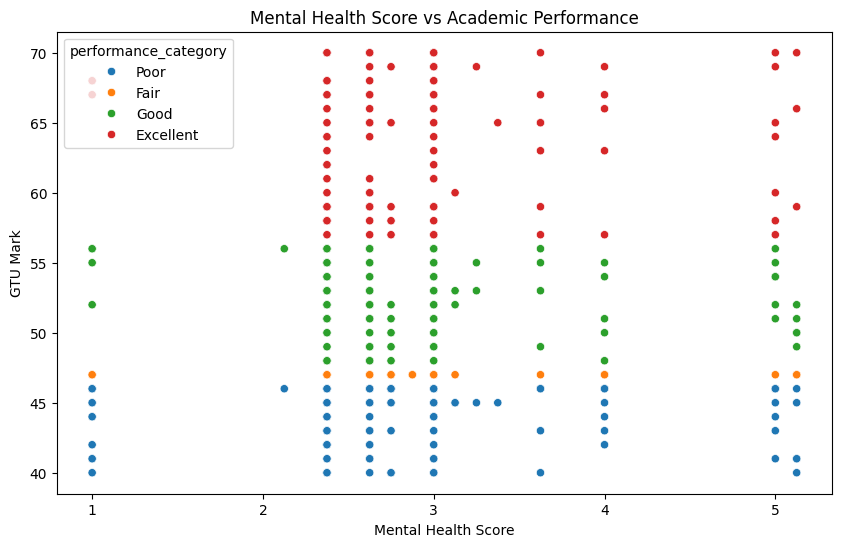

In [51]:
# Visualization 1: Relationship between mental health score and academic performance
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=combined_data,
    x='mental_health_score',
    y='semester_evaluation_gtu_mark',
    hue='performance_category'
)
plt.title('Mental Health Score vs Academic Performance')
plt.xlabel('Mental Health Score')
plt.ylabel('GTU Mark')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


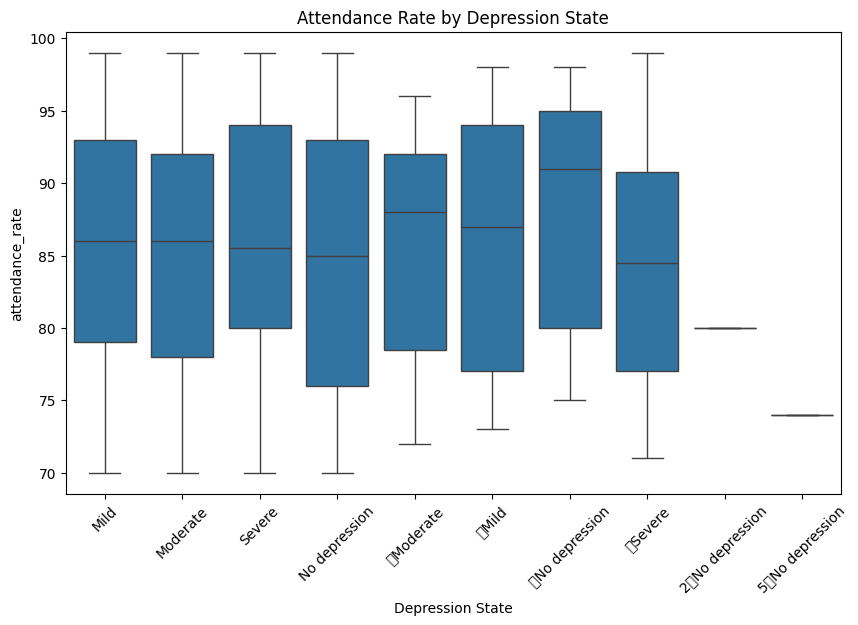

In [52]:
# Visualization 2: Attendance patterns by depression state
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=combined_data,
    x='Depression State',
    y='attendance_rate'
)
plt.title('Attendance Rate by Depression State')
plt.xticks(rotation=45)
plt.show()

<ipython-input-53-e18a74b7f136>:11: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


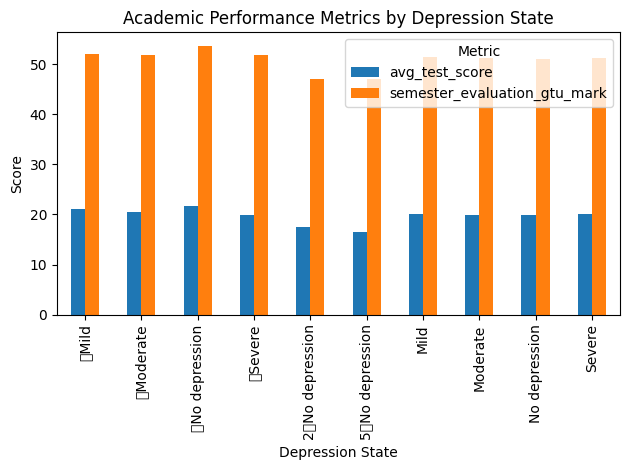

In [53]:
# Visualization 3: Academic performance metrics by depression state
plt.figure(figsize=(12, 6))
metrics_by_depression = combined_data.groupby('Depression State')[
    ['avg_test_score', 'semester_evaluation_gtu_mark']
].mean()
metrics_by_depression.plot(kind='bar')
plt.title('Academic Performance Metrics by Depression State')
plt.xlabel('Depression State')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# Statistical Analysis

The first function `analyze_correlations` and second function `compare_performance_by_depression` were created to concentrate on totally different angles of exploring correlation between mental health and so students’ performance. The correlation analysis set up a correlation matrix and a heatmap of mental health, and then analyzed how mental health scores wererelated to different elements of academic performance, including the test scores, attendance, GTU marks, etc. One significance of this matrix is that it can clearly show how two variables have high correlation coefficients. The functions for comparing performances employ ANOVA with a purpose of statistically testing for the existence of difference in academic parameters throughout the distinct depression states, and provide statistical outcomes for F statistic and p-value as well as group means and the graphical result of a box plot view.

The third function, identify_risk_factors(), is more focused, in that it only determines which, if any, of the categories of mental health (Sleep, Appetite, Interest, etc.) is most closely linked with performance. Resolving a series of correlation coefficients between each of the mental health indicators and the semester evaluation marks and ranking these correlations by the absolute correlation values, it then finds what mental health variables have the strongest correlations with the academic performance and presents these relations in a bar chart. It is of especially important for the following analysis in order to discover which of the mental health symptoms might be considered as the litmus indicators of the educational problems which might help at least in the endeavour toward increased awareness.


In [54]:
from scipy import stats

def analyze_correlations(data):
    """
    Analyzes correlations between mental health and academic performance metrics
    """
    # Select key metrics for correlation analysis
    metrics = [
        'mental_health_score',
        'avg_test_score',
        'attendance_rate',
        'semester_evaluation_gtu_mark'
    ]

    # Calculate correlation matrix
    corr_matrix = data[metrics].corr()

    # Create correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap: Mental Health vs Academic Performance')
    plt.show()

    return corr_matrix

In [55]:
def compare_performance_by_depression(data):
    """
    Compares academic performance metrics across depression states using ANOVA
    """
    # Group data by depression state
    metrics = ['avg_test_score', 'attendance_rate']
    results = {}

    for metric in metrics:
        groups = [group for _, group in data.groupby('Depression State')[metric]]
        f_stat, p_value = stats.f_oneway(*groups)

        # Calculate mean values for each group
        means = data.groupby('Depression State')[metric].mean()

        results[metric] = {
            'f_statistic': f_stat,
            'p_value': p_value,
            'group_means': means
        }

    # Visualization
    plt.figure(figsize=(12, 6))
    data.boxplot(column='avg_test_score', by='Depression State')
    plt.title('Academic Performance by Depression State')
    plt.xticks(rotation=45)
    plt.show()

    return results

In [56]:
def identify_risk_factors(data):
    """
    Identifies key mental health indicators that most strongly predict poor academic performance
    """
    # Define mental health indicators
    mental_indicators = [
        'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
        'Concentration', 'Agitation', 'Suicidal Ideation'
    ]

    # Calculate correlations with academic performance
    correlations = data[mental_indicators + ['semester_evaluation_gtu_mark']].corr()['semester_evaluation_gtu_mark']

    # Sort indicators by absolute correlation strength
    risk_factors = correlations[mental_indicators].abs().sort_values(ascending=False)

    # Visualize top risk factors
    plt.figure(figsize=(10, 6))
    risk_factors.plot(kind='bar')
    plt.title('Mental Health Risk Factors for Academic Performance')
    plt.xlabel('Mental Health Indicators')
    plt.ylabel('Absolute Correlation with Academic Performance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return risk_factors

# Correlations

The correlation heatmap and matrix show that all the academic performance indicators are positively correlated with each other and have very high correlation coefficients between avg_test_score and semester_evaluation_gtu_mark and between attendance_rate and avg_test_score. However, rather unexpectedly, the mental health score correlates very weakly with all the academic indicators: test scores (0.037), attendance (0.031), and GTU marks (0.041) in this dataset, which means that there is not a clear positive linear relationship between students’ mental health scores and their academic performance or attendance. This may be an interesting discovery that suggests that the link between mental health and academic achievement is not as straightforward as simple correlation analysis might indicate, or that there are other factors at play that need to be explored.

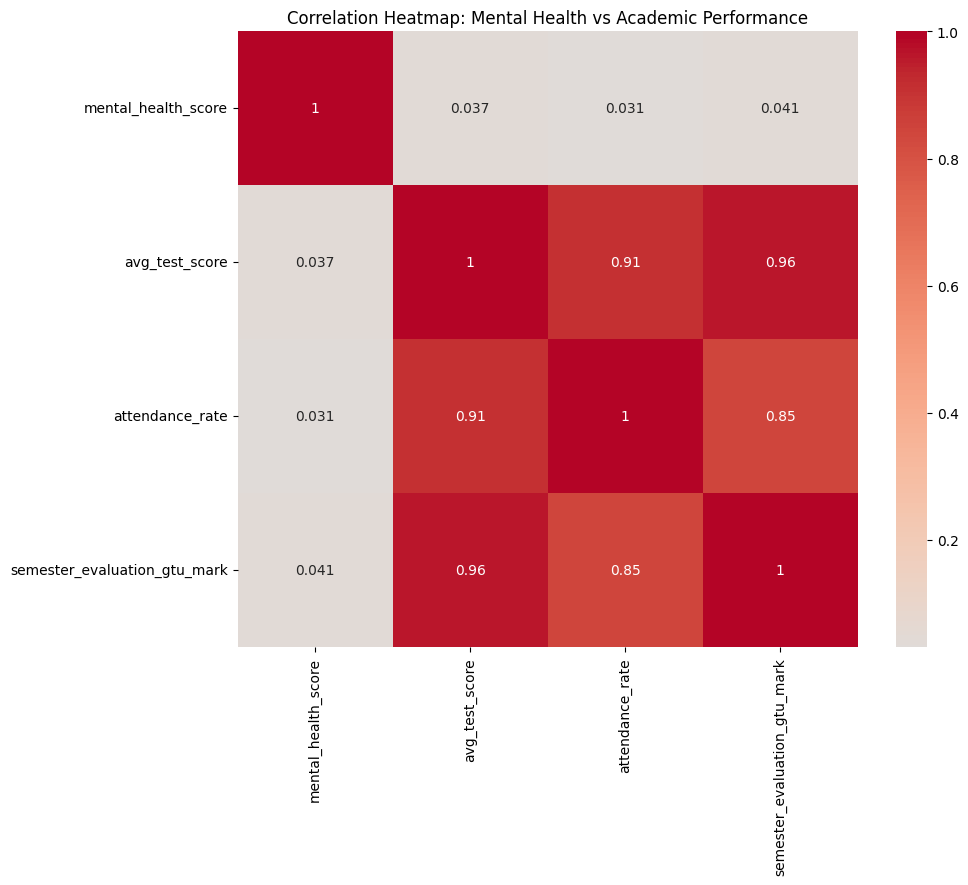


Correlation Matrix:
                              mental_health_score  avg_test_score  \
mental_health_score                         1.000           0.037   
avg_test_score                              0.037           1.000   
attendance_rate                             0.031           0.907   
semester_evaluation_gtu_mark                0.041           0.962   

                              attendance_rate  semester_evaluation_gtu_mark  
mental_health_score                     0.031                         0.041  
avg_test_score                          0.907                         0.962  
attendance_rate                         1.000                         0.846  
semester_evaluation_gtu_mark            0.846                         1.000  


In [57]:
correlations = analyze_correlations(combined_data)
print("\nCorrelation Matrix:")
print(correlations.round(3))

# Depression Analysis

The boxplot and the ANOVA test show some patterns of academic performance in different depression states. The boxplot also reveals that the distributions of academic performance are quite similar across all the states of depression and the result is confirmed statistically by the high p-values (0.886 for avg_test_score and 0.807 for attendance_rate) and low F-statistics (0.483 and 0.588 respectively) suggesting that there are no significant differences between the groups. Meaningful values also add to this by showing that average test scores range from 19.88 (Severe) to 21.75 (No depression) while attendance rates range from 74.00% to 88.27% across depression states. These findings imply that depression state may not be a powerful indicator of academic performance or attendance patterns in this dataset, which is consistent with the findings of the previous correlation analysis.

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


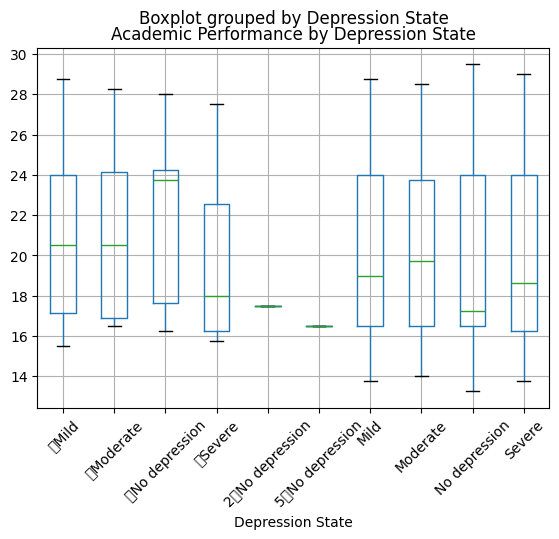


avg_test_score:
F-statistic: 0.483
p-value: 0.886

Mean values by group:
Depression State
\tMild              21.11
\tModerate          20.59
\tNo depression     21.75
\tSevere            19.88
2\tNo depression    17.50
5\tNo depression    16.50
Mild                20.16
Moderate            20.00
No depression       19.92
Severe              20.12
Name: avg_test_score, dtype: float64

attendance_rate:
F-statistic: 0.588
p-value: 0.807

Mean values by group:
Depression State
\tMild              86.00
\tModerate          85.45
\tNo depression     88.27
\tSevere            84.80
2\tNo depression    80.00
5\tNo depression    74.00
Mild                85.35
Moderate            84.88
No depression       84.55
Severe              85.66
Name: attendance_rate, dtype: float64


In [58]:
depression_analysis = compare_performance_by_depression(combined_data)
for metric, results in depression_analysis.items():
    print(f"\n{metric}:")
    print(f"F-statistic: {results['f_statistic']:.3f}")
    print(f"p-value: {results['p_value']:.3f}")
    print("\nMean values by group:")
    print(results['group_means'].round(2))

# Risk Factors

The bar chart and correlation values presented above show the strength of the relationships between the tested mental health variables and academic achievement (GTU marks). The highest correlation is observed with Suicidal Ideation (0.036), then Worthlessness (0.034) and Fatigue (0.033), while the lowest correlation is observed with Appetite (0.001), Interest (0.002) and Concentration (0.003). However, all correlation coefficients are less than 0.04, which means that none of the mental health factors in this study are positively linearly correlated with academic performance. This result is somewhat surprising and might suggest that there are other factors that moderate the association between mental health and academic performance that were not accounted for in this study.

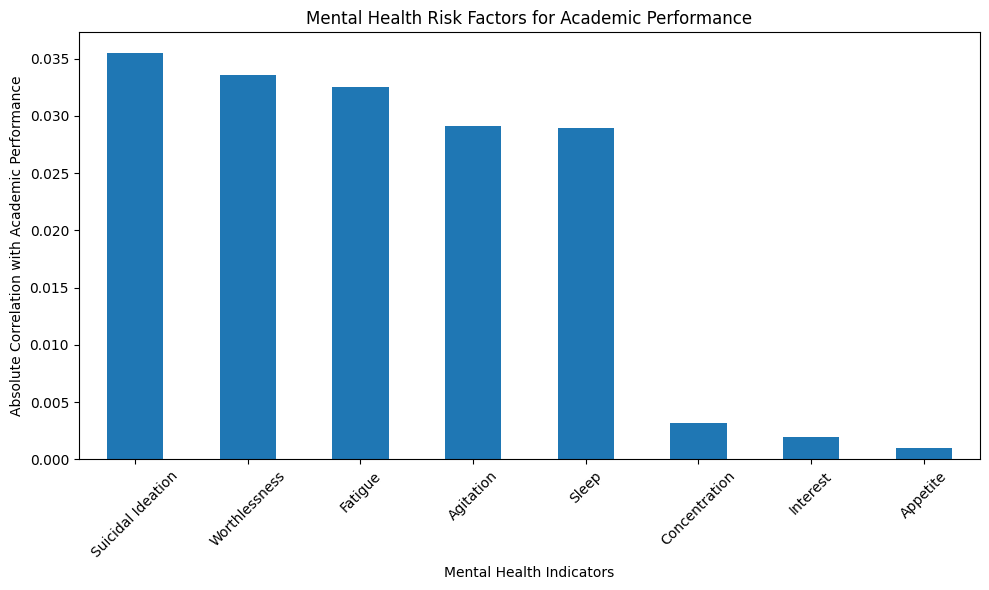


Risk factors by correlation strength:
Suicidal Ideation    0.036
Worthlessness        0.034
Fatigue              0.033
Agitation            0.029
Sleep                0.029
Concentration        0.003
Interest             0.002
Appetite             0.001
Name: semester_evaluation_gtu_mark, dtype: float64


In [59]:
risk_factors = identify_risk_factors(combined_data)
print("\nRisk factors by correlation strength:")
print(risk_factors.round(3))

# Conclusion
The correlation analysis of mental health and academic performance in this dataset has some surprising results. Contrary to expectations, we find rather low associations between the mental health indicators and the academic performance measures. The correlation heatmap shows high correlation of test scores, attendance, and GTU marks, but the mental health scores have very low correlation with any academic indicators with all the coefficients being less than 0.05.

This is also evident in the ANOVA analysis of the students’ academic performance by different depression states. As shown in table 3, we obtained high p-values (>0.8) and low F-statistics for both test scores and attendance rates, which means that there were no significant differences among the groups with different depression severity. This indicates that students who have varying degrees of depression have comparable academic performance, which questions the relationship between depression and academic performance.

Even when we looked at individual mental health indicators as predictors of risk, we saw that the coefficients were very small – the highest being 0.036 for Suicidal Ideation, 0.034 for Worthlessness, and 0.033 for Fatigue. Such a consistent pattern of weak associations across different levels of analysis and using different analytical strategies implies that there might be other factors moderating the relationship between mental health and academic performance that are not captured by the present analysis, or there could be other protective resources that might be in place to help students with mental health issues to perform well academically. It is possible that additional research with more complex statistical techniques and other variables might be needed to establish these relationships.